In [1]:
import numpy as np
import typer
from astropy.table import Table, QTable
from astropy.coordinates import SkyCoord, Angle
import astropy.units as u

from matplotlib import pyplot as plt
import seaborn as sns
import seaborn.objects as so
import pandas as pd

In [2]:
ORIGIN = SkyCoord.from_name("wr124", cache=True)

In [3]:
from pathlib import Path

In [4]:
datapath = Path.cwd().parent / "data" / "reproject"

In [5]:
prefix = "wr124-hst-2008-f656n-radec"
table = QTable.read(datapath / f"{prefix}-knot-fluxes.ecsv")

In [6]:
table

label,Center,Peak,PA,Sep,Core Flux,Halo Flux,Bright Peak,Bright BG,Isolated
,"deg,deg","deg,deg",deg,arcsec,,,,,
str10,SkyCoord,SkyCoord,float64,float64,float32,float32,float32,float64,bool
PA296-R030,"287.87789578469875,16.86096204177071","287.877898659302,16.860964425944477",296.28153574111286,2.9841626738870715,59.213135,142.35716,0.99528867,0.3447472006082535,False
PA067-R032,"287.87949950442567,16.860935900613693","287.8795002887479,16.860938592192227",66.86947493936553,3.1549125149909147,25.638582,444.40985,0.95200294,0.48857472836971283,False
PA031-R033,"287.8791458692158,16.861382097170157","287.8791493711526,16.861386371124887",30.919260644413303,3.3108251070294017,96.54263,340.75208,2.0847006,0.6514793634414673,False
PA072-R035,"287.87964489715415,16.86087799578421","287.87964425511205,16.860878313768055",71.97437921876036,3.5235564474513,56.315887,391.88873,1.0158854,0.3904679656028748,False
PA017-R038,"287.8789775303131,16.86161069339155","287.8789784107064,16.861610260360283",16.829907671084754,3.803227856282498,74.60344,776.0485,1.4058148,0.5156514644622803,False
PA058-R044,"287.8797736016353,16.86127178513465","287.8797702282758,16.86127442423109",57.69177263933969,4.378772881478465,22.07224,404.77368,0.6536312,0.29681635499000547,False
...,...,...,...,...,...,...,...,...,...
PA190-R293,"287.8770895708093,16.85260030542011","287.8770889154469,16.852603032592206",190.4969656328342,29.288811227632436,32.457954,132.43752,0.42165706,0.08381711691617966,False


In [36]:
so.Plot.config.theme.update(sns.axes_style("whitegrid"))
so.Plot.config.theme.update(sns.plotting_context("notebook"))

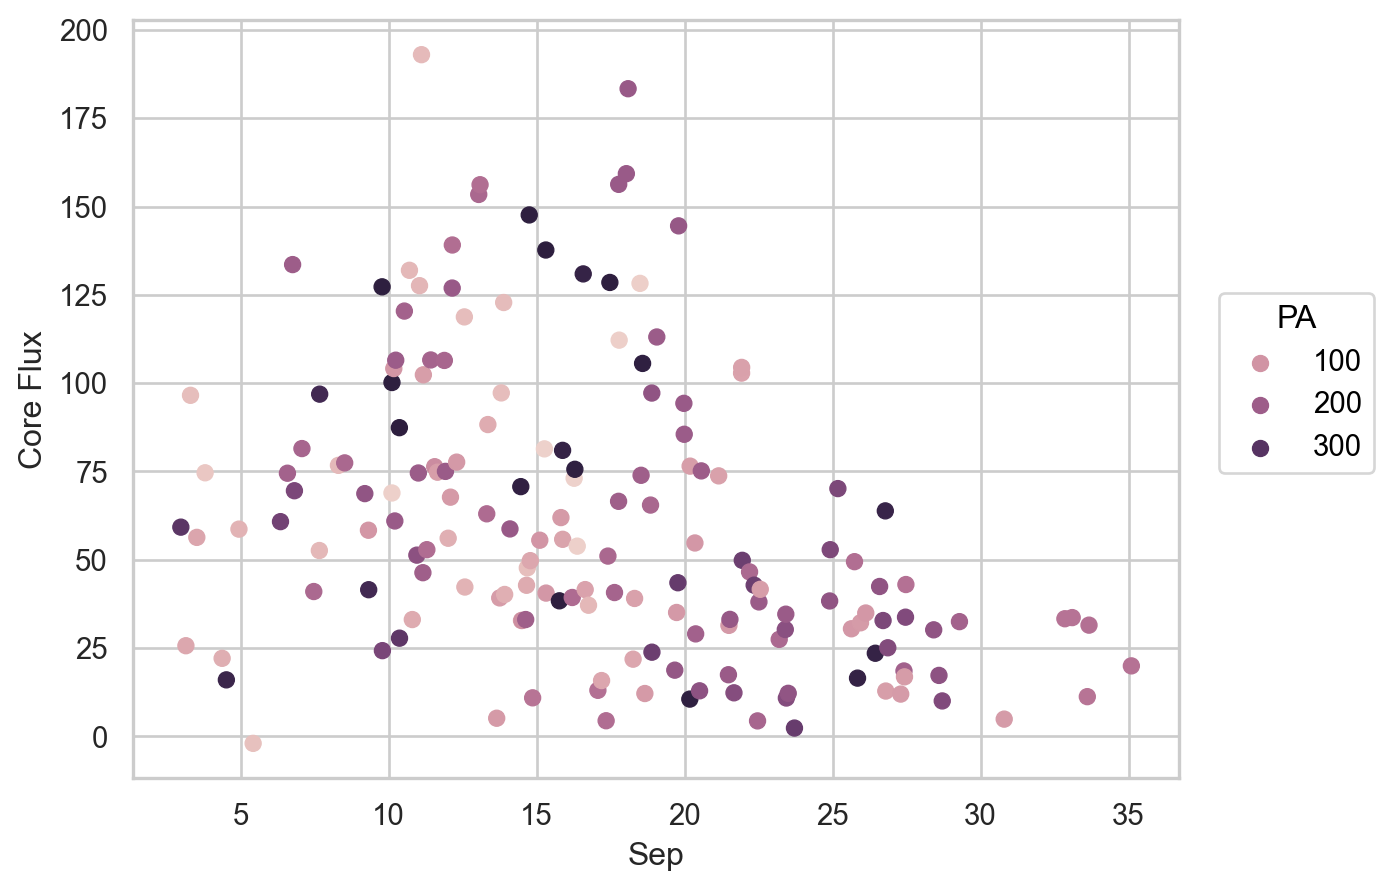

In [37]:
(
    so.Plot(table.to_pandas(), x="Sep", y="Core Flux", color="PA")
    .add(so.Dot())
)

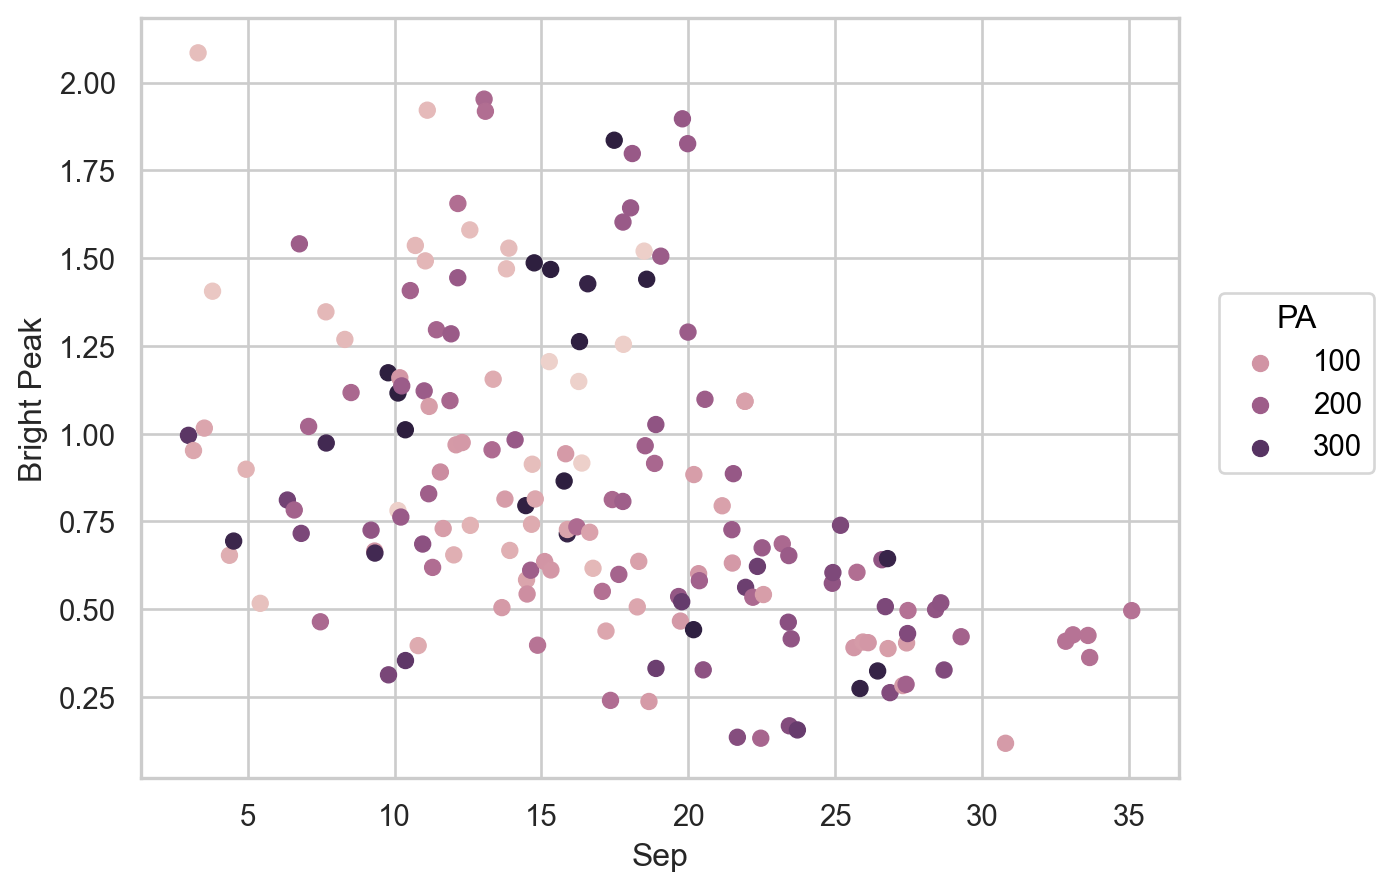

In [38]:
(
    so.Plot(table.to_pandas(), x="Sep", y="Bright Peak", color="PA")
    .add(so.Dot())
)

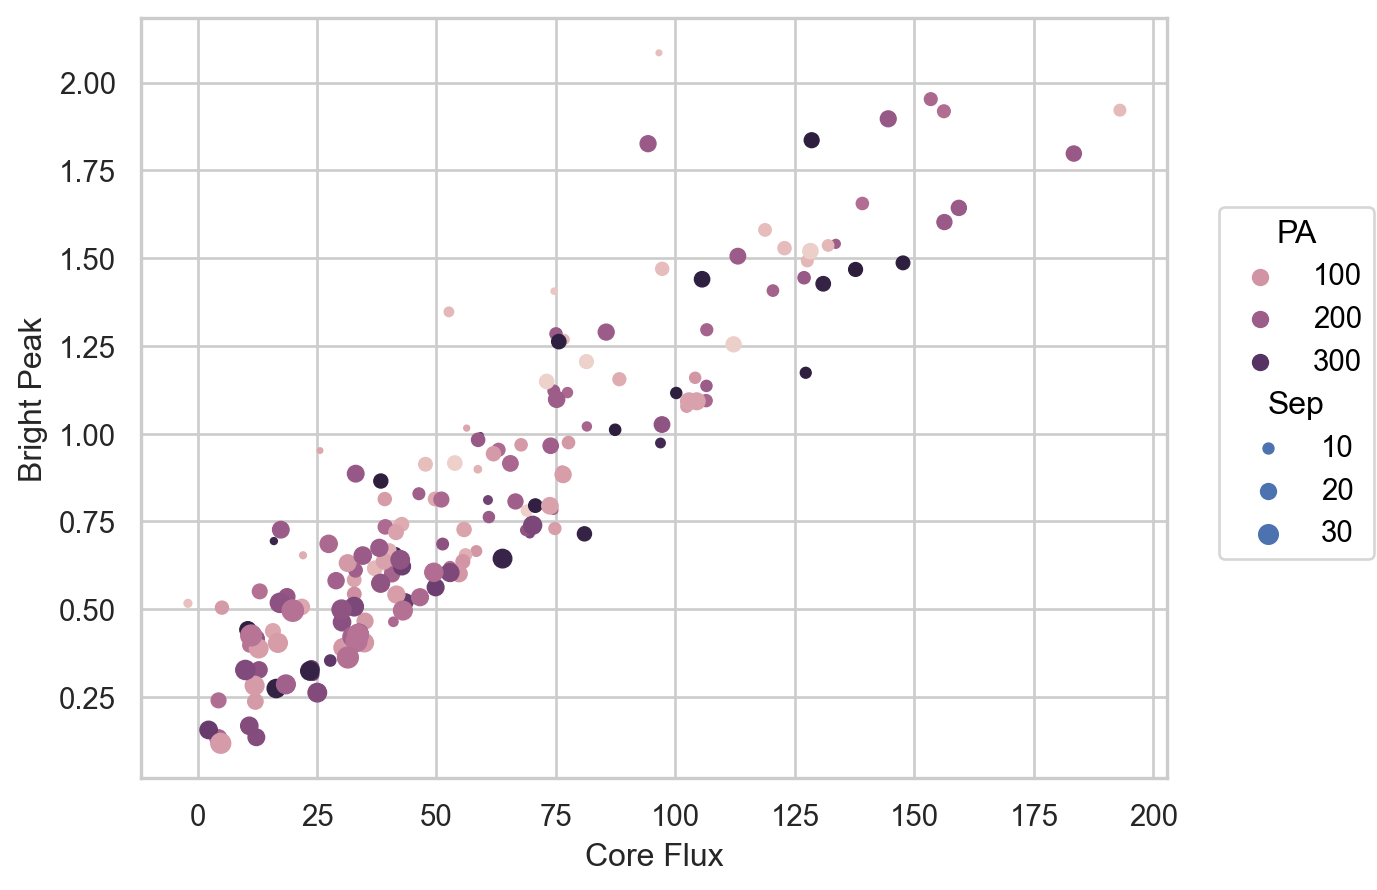

In [39]:
(
    so.Plot(table.to_pandas(), x="Core Flux", y="Bright Peak", color="PA", pointsize="Sep")
    .add(so.Dot())
)

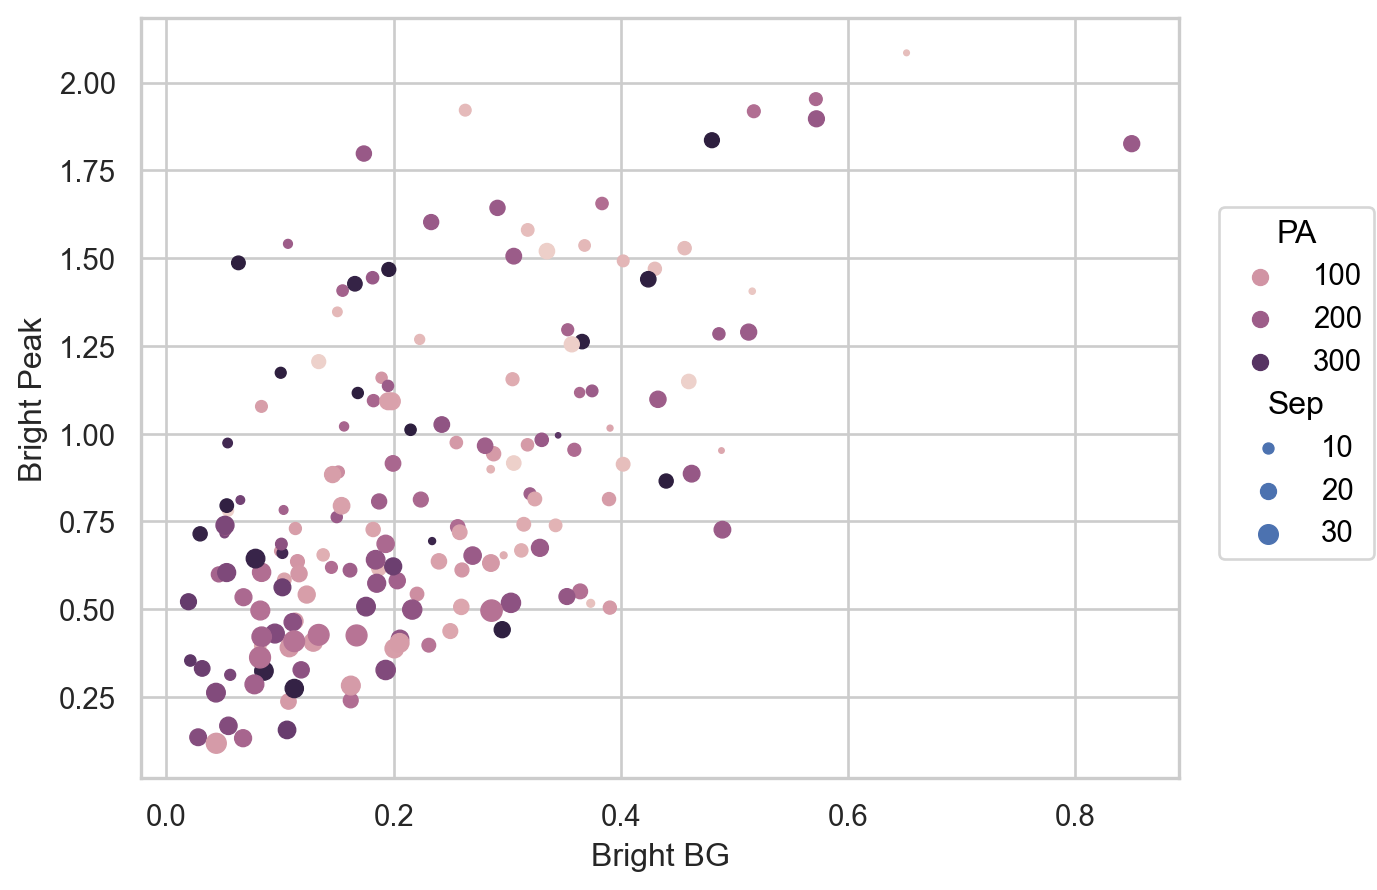

In [40]:
(
    so.Plot(table.to_pandas(), x="Bright BG", y="Bright Peak", color="PA", pointsize="Sep")
    .add(so.Dot())
)